In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [569]:
trainset = pd.read_csv('./dataset/train.csv')
testset = pd.read_csv('./dataset/test.csv')
# trainset = trainset[trainset.GrLivArea < 4000]
# testset = testset[testset.GrLivArea < 4000]
y_train = trainset.SalePrice.values
y_train = np.log(y_train +1)

trainset.columns
pd.set_option('display.max_columns', 999)

In [570]:
ntrain = trainset.shape[0]
ntest = testset.shape[0]

all_data = pd.concat((trainset, testset)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [571]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

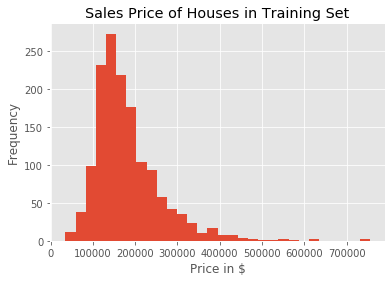

In [572]:
# General Look at SalePrice
trainset['SalePrice'].plot.hist(bins = 30)
plt.xlabel('Price in $')
plt.title('Sales Price of Houses in Training Set')

trainset['SalePrice'].describe() # Taking a look at the distribution

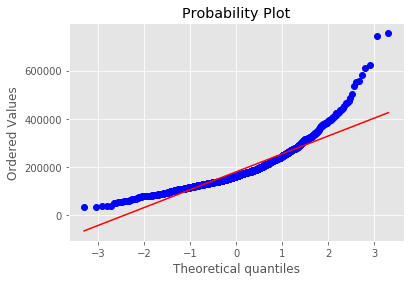

In [573]:
from scipy import stats
res = stats.probplot(trainset['SalePrice'], plot=plt)


Text(0.5, 1.0, 'Log Sales Price of Houses in Training Set')

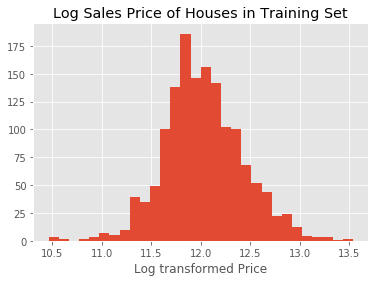

In [574]:
plt.hist(y_train, bins = 30)
plt.xlabel('Log transformed Price')
plt.title('Log Sales Price of Houses in Training Set')

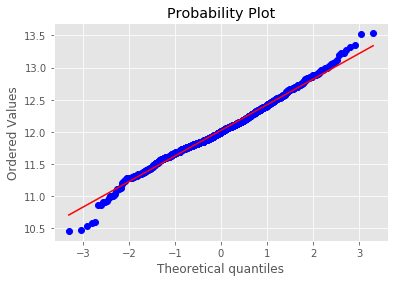

In [575]:
res = stats.probplot(y_train, plot=plt)

/home/annie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e803f450>,
      dtype=object)

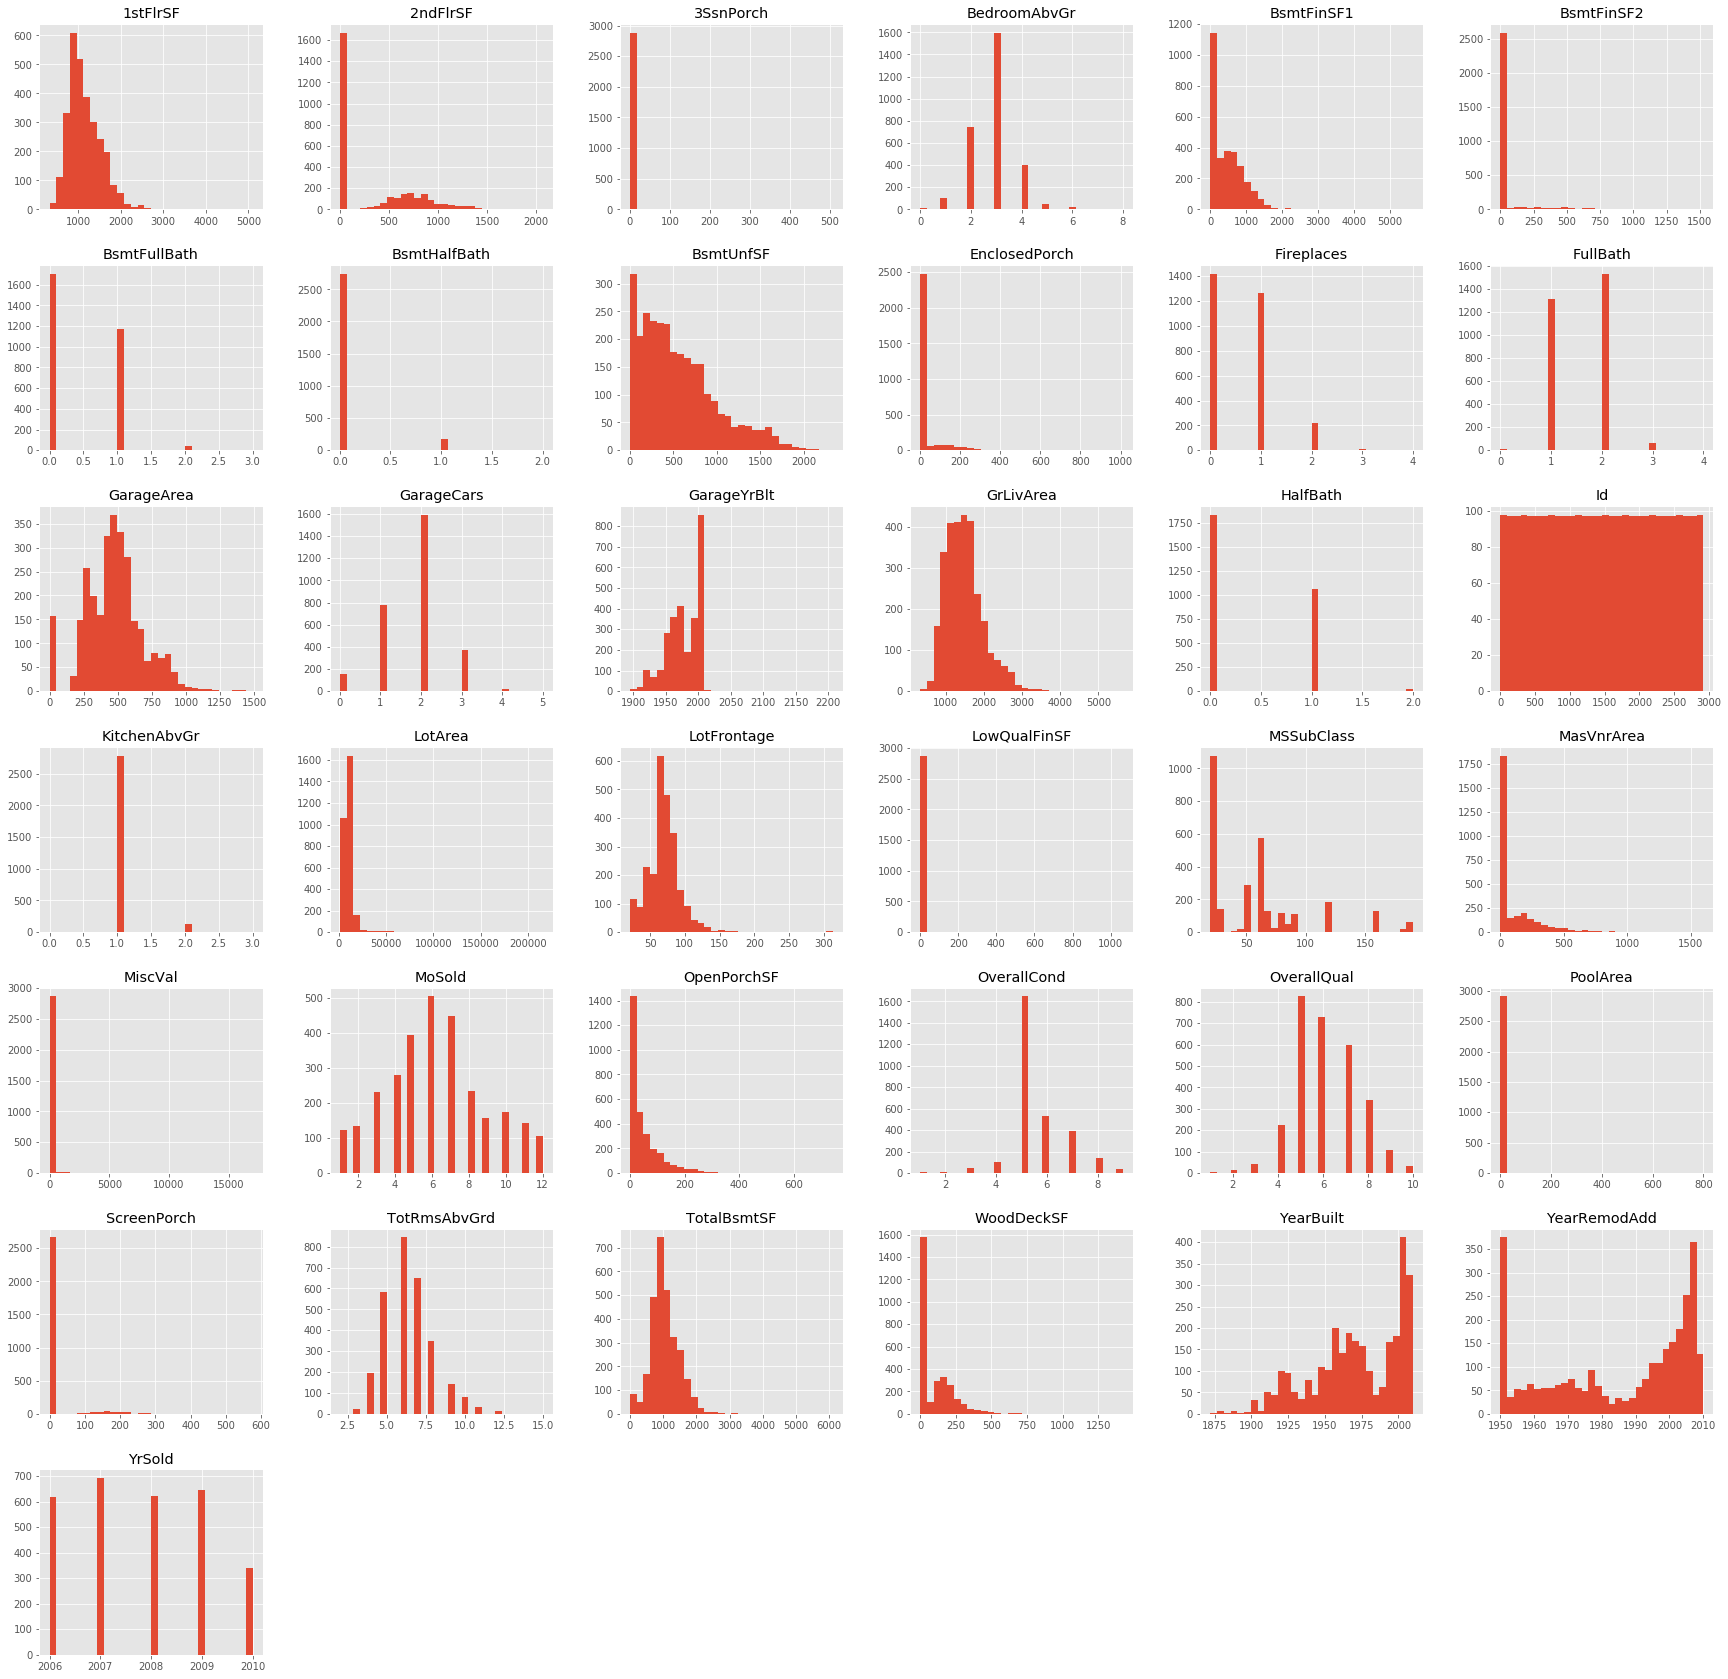

In [576]:
data_num = all_data.select_dtypes(include=['int64', 'float64']).copy()
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
data_num.hist(ax = ax, bins = 30)

/home/annie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa11a0fefd0>,
      dtype=object)

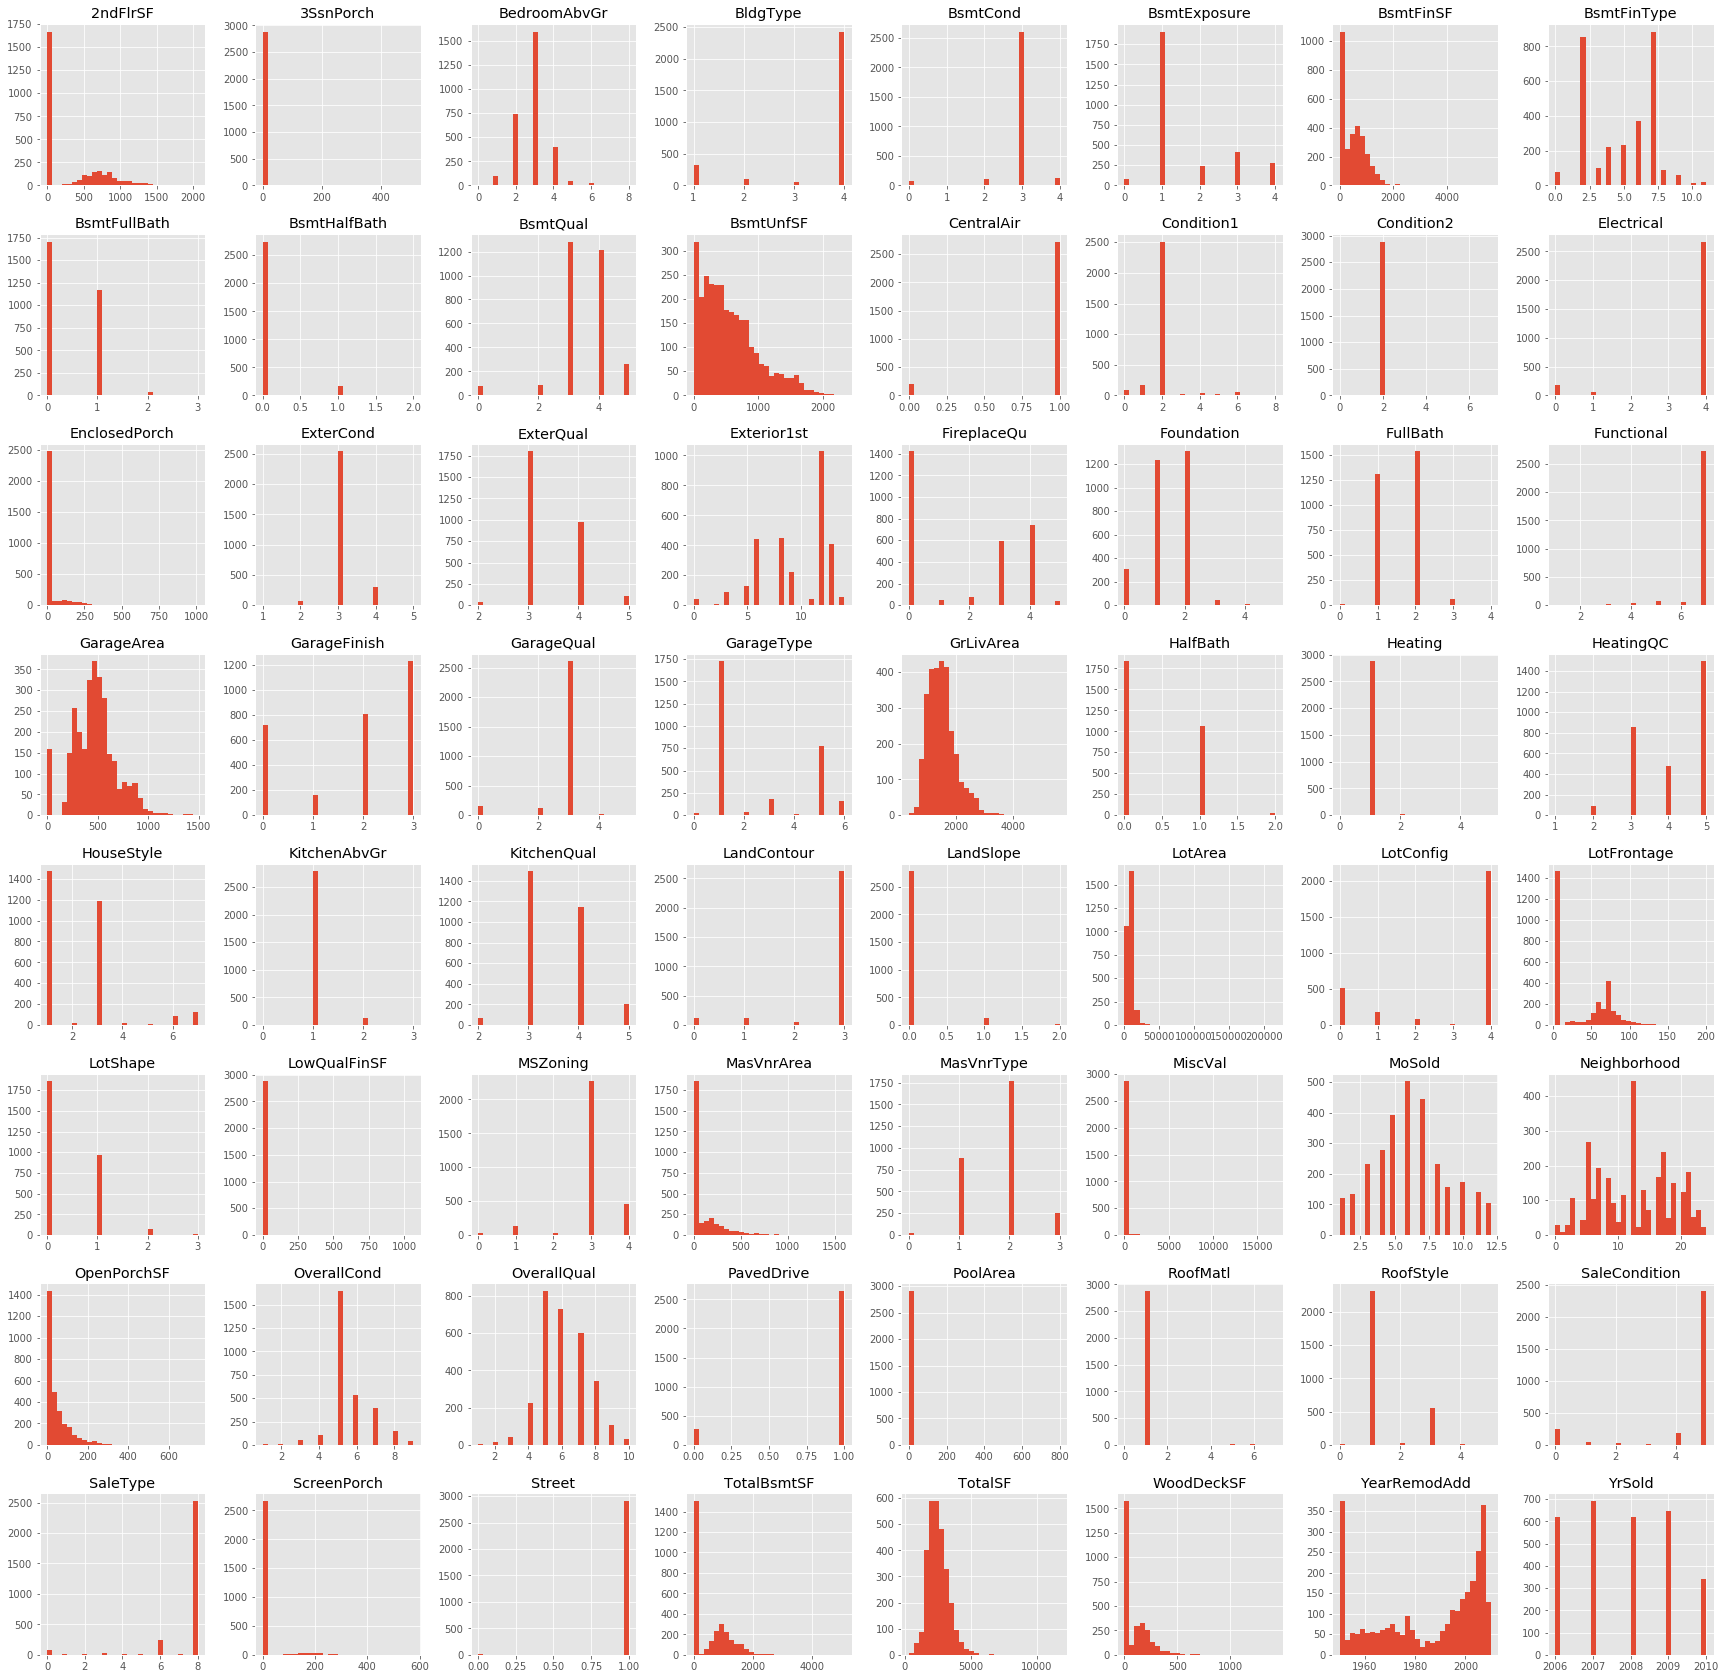

In [564]:
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
all_data.hist(ax = ax, bins = 30)

In [578]:
all_data[all_data.isnull().any(axis=1)] 
nullnum = {}
percentage = {}
for element in all_data.columns:
    nullnum[element] = all_data[element].isna().sum()
    percentage[element] = all_data[element].isna().sum()/all_data[[element]].shape[0] * 100

pd.DataFrame(sorted(percentage.items(), key=lambda x: x[1], reverse=True), columns = ['Feature', '% NA']).head(15)
#sorted(percentage.items(), key=lambda x: x[1], reverse=True)

,Feature,% NA
0,PoolQC,99.657417
1,MiscFeature,96.402878
2,Alley,93.216855
3,Fence,80.438506
4,FireplaceQu,48.646797
5,LotFrontage,16.649538
6,GarageYrBlt,5.447071
7,GarageFinish,5.447071
8,GarageQual,5.447071
9,GarageCond,5.447071


In [579]:
#Some of the columns look like they're mostly Na values. 
# Let's remove the four columns that are mostly na values
remove = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id']
all_data.drop(remove, axis = 1, inplace = True)

LotFrontage mean is: 69.31


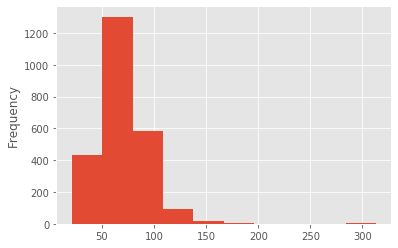

In [580]:
#trainset.columns[trainset.isnull().any(axis=0)] 

#LotFrontage Imputation
all_data[all_data['LotFrontage'].isna()]
print('LotFrontage mean is: %.2f' %all_data['LotFrontage'].mean())
all_data['LotFrontage'].plot(kind = 'hist')
# Since the mean 69.31 seems to match well with the histogram, we can impute the missing values with the mean
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())

In [581]:
# MasVnrType imputation
all_data[all_data['MasVnrType'].isna()]
all_data['MasVnrType'].value_counts()


None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

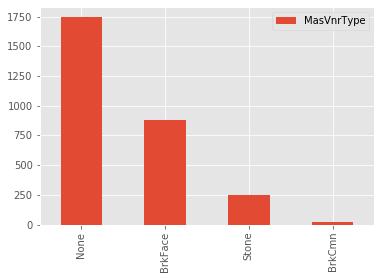

In [582]:
pd.DataFrame(all_data['MasVnrType'].value_counts()).plot(kind = 'bar')
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

Masonry veneer area mean is: 102.20


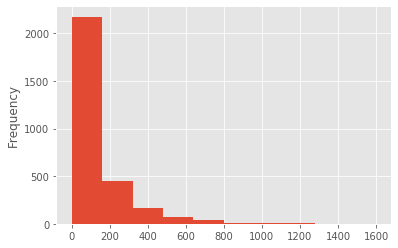

In [583]:
all_data[all_data['MasVnrArea'].isna()]
print('Masonry veneer area mean is: %.2f' %all_data['MasVnrArea'].mean())
# None values of the Masonry veneer means there is no masonry veneer, so we will impute these values as 0
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrArea'].plot(kind = 'hist')

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')


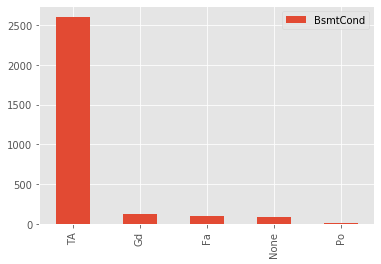

In [584]:
print(all_data.columns[all_data.isnull().any(axis=0)])
#Na for Basement quality refers to no basement, so we shouldn't impute / 37 no basements 
all_data['BsmtQual'].isna().sum()
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtCond'].isna().sum() # impute 'None' for basements with no basements!
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')
pd.DataFrame(all_data['BsmtCond'].value_counts()).plot(kind = 'bar')

In [585]:
# Impute Basement Variables
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')

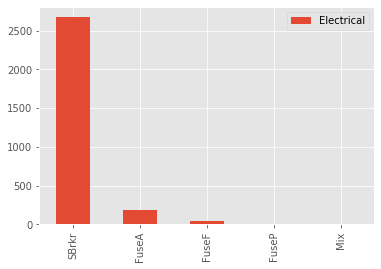

In [586]:
#Impute Electrical NA
all_data[all_data['Electrical'].isna()] # Assume standard circuit for the na for electric
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')
pd.DataFrame(all_data['Electrical'].value_counts()).plot(kind = 'bar')

In [587]:
# Impute Fireplace Quality NA
print(all_data.columns[all_data.isnull().any(axis=0)])
all_data[all_data['FireplaceQu'].isna()]
#Fireplace Quality is na because there are no fireplaces for these houses
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')


In [588]:
print(all_data.columns[all_data.isnull().any(axis=0)])
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)



Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')


In [589]:
print(all_data.columns[all_data.isnull().any(axis=0)])

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')


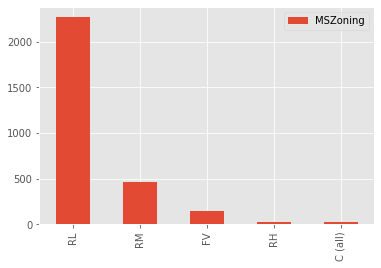

In [590]:
#MSZoning imputation
all_data[all_data['MSZoning'].isna()] # Assume standard circuit for the na for electric
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
pd.DataFrame(all_data['MSZoning'].value_counts()).plot(kind = 'bar')

In [591]:
#BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath',BsmtFinSF1 imputation
all_data[all_data['BsmtUnfSF'].isna()]
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

In [592]:
all_data['Utilities'].value_counts()
#all_data[all_data['Utilities'].isna()]
#There is only 2 NAs, this seems like random, and unrelated. In fact, all utilities are 'AllPub' except for one. We will delete this feature/
all_data.drop(['Utilities'], axis = 1, inplace=True)

In [593]:
all_data['Exterior1st'].value_counts() # we can't just delete these values, since there is no discernable pattern
# We will imput the NAs with the mode.
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [594]:
all_data['KitchenQual'].value_counts() # again, impute with the node, as 'Typical'
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [595]:
all_data['Functional'].value_counts() # Impute missing values with typical, the mode.
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

In [596]:
all_data['SaleType'].value_counts() # No other information on missing values, and no particular pattern. Impute with mode. 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [597]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


## Categorical Features and Dummifying

In [598]:
print(all_data.info())
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

### Dividing into Binary/Non-binary Nominal/Ordinal categorical features

In [599]:
data_cat = all_data.select_dtypes(include=['object']).copy()
data_cat.head()
nominal = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle',
          'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'CentralAir', 'Electrical', 
           'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType']
ordinal = ['LotShape', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BmstExposure', 
          'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'SaleCondition']

In [600]:
data_cat.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [601]:
#Binary categorical features
all_data["CentralAir"] = np.where(all_data["CentralAir"].str.contains("Y"), 1, 0)

In [602]:
all_data["PavedDrive"] = np.where(all_data["PavedDrive"].str.contains("Y"), 1, 0)

In [603]:
# Label Encode nominal categorical values 
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
for column in nominal:
    all_data[column] = lb_make.fit_transform(all_data[column])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,Reg,3,4,Gtl,5,2,2,1Fam,2Story,7,5,2003,2003,1,1,12,13,1,196.0,Gd,TA,2,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1,Ex,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,1,2003.0,2,2.0,548.0,TA,TA,1,0,61,0,0,0,0,0,2,2008,8,Normal
1,20,3,80.0,9600,1,Reg,3,2,Gtl,24,1,2,1Fam,1Story,6,8,1976,1976,1,1,8,8,2,0.0,TA,TA,1,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,1,Ex,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,1,1976.0,2,2.0,460.0,TA,TA,1,298,0,0,0,0,0,0,5,2007,8,Normal
2,60,3,68.0,11250,1,IR1,3,4,Gtl,5,2,2,1Fam,2Story,7,5,2001,2002,1,1,12,13,1,162.0,Gd,TA,2,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1,Ex,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,1,2001.0,2,2.0,608.0,TA,TA,1,0,42,0,0,0,0,0,9,2008,8,Normal
3,70,3,60.0,9550,1,IR1,3,0,Gtl,6,2,2,1Fam,2Story,7,5,1915,1970,1,1,13,15,2,0.0,TA,TA,0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1,Gd,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,5,1998.0,3,3.0,642.0,TA,TA,1,0,35,272,0,0,0,0,2,2006,8,Abnorml
4,60,3,84.0,14260,1,IR1,3,2,Gtl,15,2,2,1Fam,2Story,8,5,2000,2000,1,1,12,13,1,350.0,Gd,TA,2,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1,Ex,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,1,2000.0,2,3.0,836.0,TA,TA,1,192,84,0,0,0,0,0,12,2008,8,Normal


In [604]:
# Encoding Ordinal categorical values
ordinal
ordinalEncode = {"LotShape": {"Reg": 0, "IR1": 1,
                                 "IR2": 2, "IR3": 3},
                "LandSlope": {"Gtl": 0, "Mod": 1, "Sev": 2},
                "BldgType": {"TwnhsI":1, "TwnhsE":1, "Twnhs":1, "Duplx":2, "Duplex":2, "2FmCon":3, "2fmCon":3, "1Fam": 4},
                "HouseStyle": {"1Story": 1, "1.5Fin": 3, "1.5Unf": 2,
                              "2Story": 3, "2.5Fin": 5, "2.5Unf": 4,
                              "SFoyer": 6, "SLvl": 7},
                 "HeatingQC": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
                 "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                 "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                 "BsmtQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                 "BsmtCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                 "BsmtExposure": {"None":0, "No":1, "Mn": 2, "Av": 3, "Gd":4},
                 "BsmtFinType1": {"None":0, "Unf":1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
                 "BsmtFinType2": {"None":0, "Unf":1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
                 "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5},
                 "Functional": {"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod": 4, "Min2": 5, "Min1":6, "Typ":7},
                 "FireplaceQu": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
                 "GarageQual": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
                 "GarageCond": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
                 "SaleCondition": {"Partial":0, "Family":1, "Alloca":2, "AdjLand":3, "Abnorml":4, "Normal":5} 
                }

all_data = all_data.replace(ordinalEncode)


In [605]:
all_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,4,0,5,2,2,4,3,7,5,2003,2003,1,1,12,13,1,196.0,4,3,2,4,3,1,6,706.0,1,0.0,150.0,856.0,1,5,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,7,0,0,1,2003.0,2,2.0,548.0,3,3,1,0,61,0,0,0,0,0,2,2008,8,5
1,20,3,80.0,9600,1,0,3,2,0,24,1,2,4,1,6,8,1976,1976,1,1,8,8,2,0.0,3,3,1,4,3,4,5,978.0,1,0.0,284.0,1262.0,1,5,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,7,1,3,1,1976.0,2,2.0,460.0,3,3,1,298,0,0,0,0,0,0,5,2007,8,5
2,60,3,68.0,11250,1,1,3,4,0,5,2,2,4,3,7,5,2001,2002,1,1,12,13,1,162.0,4,3,2,4,3,2,6,486.0,1,0.0,434.0,920.0,1,5,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,7,1,3,1,2001.0,2,2.0,608.0,3,3,1,0,42,0,0,0,0,0,9,2008,8,5
3,70,3,60.0,9550,1,1,3,0,0,6,2,2,4,3,7,5,1915,1970,1,1,13,15,2,0.0,3,3,0,3,4,1,5,216.0,1,0.0,540.0,756.0,1,4,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,7,1,4,5,1998.0,3,3.0,642.0,3,3,1,0,35,272,0,0,0,0,2,2006,8,4
4,60,3,84.0,14260,1,1,3,2,0,15,2,2,4,3,8,5,2000,2000,1,1,12,13,1,350.0,4,3,2,4,3,3,6,655.0,1,0.0,490.0,1145.0,1,5,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,7,1,3,1,2000.0,2,3.0,836.0,3,3,1,192,84,0,0,0,0,0,12,2008,8,5


In [606]:
trainset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [607]:
# Correlation matrix 
corr = trainset.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

Based on the correlation matrix above, we see a high correlation between TotalBsmtSF and 1stFlrSF, as well as GrLivArea and TotRmsAbvGrd, GarageCars and GarageArea. There seems to be some multicolinearity in the dataset. 

In [608]:
#corr['SalePrice'].sort_values(ascending=False)
corr[corr['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

Since TotalBsmtSF and 1stFlrSF are highly correlated, I will omit 1stFlrSF (TotalBsmtSF has a higher correlation with SalePrice). 
Since GrLivArea and TotRmsAbvGrd are highly correlated, I will omit TotRmsAbvGrd.
Since GarageCars and GarageArea are highly correlated, I will omit GarageCars.

In [609]:
# log transform features and target
# discuss different regression techniques: linear regression, tree? 
#trainset.drop("Id", axis = 1, inplace = True)
all_data["BsmtFinType"] = all_data["BsmtFinType1"] + all_data["BsmtFinType2"]
all_data["BsmtFinSF"] = all_data["BsmtFinSF1"] + all_data["BsmtFinSF2"]
all_data["TotalSF"] = all_data['TotalBsmtSF'] + all_data["1stFlrSF"] + all_data['2ndFlrSF']
remove = ["1stFlrSF", "TotRmsAbvGrd", "GarageCars", "GarageYrBlt",'GarageCond', 'Exterior2nd', "MSSubClass", "Fireplaces",
         "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", "BsmtFinSF2", "YearBuilt"]
all_data.drop(remove, axis = 1, inplace = True)


In [610]:
all_data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'BsmtFinType', 'BsmtFinSF', 'TotalSF'],
      dtype='object')

In [611]:
trainset = all_data[:ntrain]
testset = all_data[ntrain:]

In [612]:
corr = trainset.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

In [613]:
print(trainset.shape, testset.shape)

(1460, 64) (1459, 64)


ValueError: num must be 1 <= num <= 36, not 37

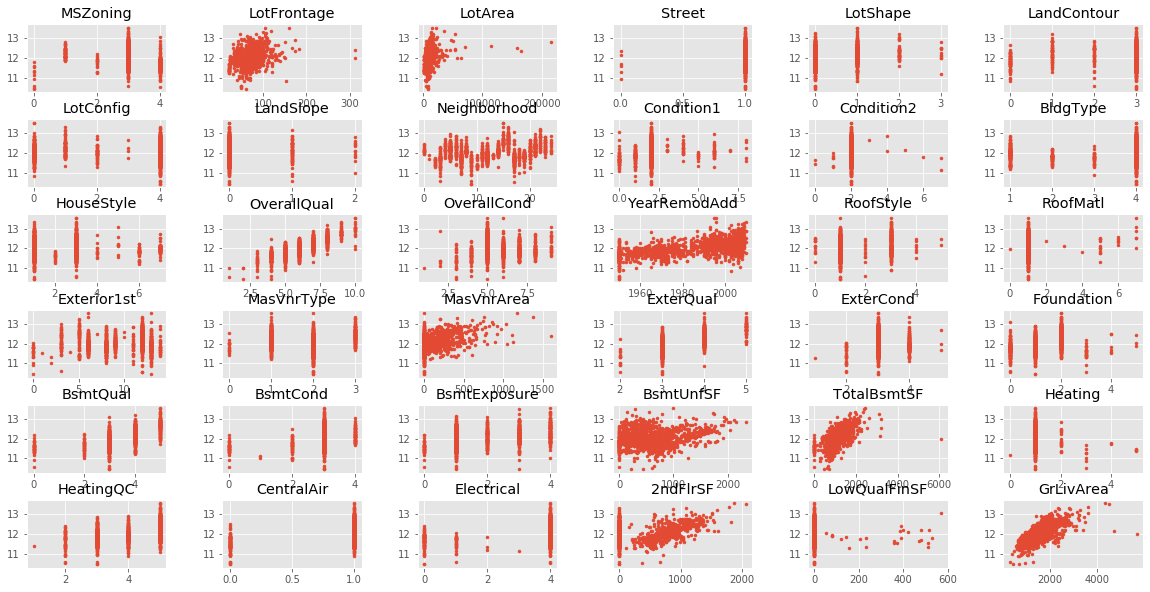

In [614]:

fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(trainset.columns)):
    ax = fig.add_subplot(6, 6, i+1)
    ax.scatter(x = trainset[trainset.columns[i]], y = y_train, marker = '.')
    ax.set_title(f'{trainset.columns[i]}')

In [ ]:
trainset['GrLivArea'] = np.log(trainset['GrLivArea']+1)
trainset['LotFrontage'] = np.log(trainset['LotFrontage']+1)
trainset['LotArea'] = np.log(trainset['LotArea']+1)
trainset['TotalBsmtSF'] = np.log(trainset['TotalBsmtSF']+1)

In [ ]:
# Cursory look at the linear relationship between SalePrice and numeric independent variables 
trainset.head()

fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(trainset.columns)):
    ax = fig.add_subplot(6, 6, i+1)
    ax.scatter(x = trainset[trainset.columns[i]], y = y_train, marker = '.')
    ax.set_title(f'{trainset.columns[i]}')

In [ ]:
print(len(y_train))
trainset.shape
trainset.describe()

In [ ]:
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(trainset, y_train, test_size=0.2, random_state=0)

# np.random.seed(1)
# testIdxes = np.random.choice(range(117), size= 35, replace=False)
# trainIdxes = list(set(range(117))-set(testIdxes))
# trainX = trainset.iloc[trainIdxes]
# testX  = trainset.iloc[testIdxes]
# trainY = y_train[trainIdxes]
# testY  = y_train[testIdxes]

In [ ]:
print(trainX.columns[trainX.isnull().any(axis=0)])
trainX

### Multiple Linear Regression 

(array([  1.,   0.,   1.,   4.,   8.,  21., 236., 716., 165.,  16.]),
 array([-1.1787507 , -1.01887458, -0.85899847, -0.69912235, -0.53924624,
        -0.37937013, -0.21949401, -0.0596179 ,  0.10025822,  0.26013433,
         0.42001045]),
 <a list of 10 Patch objects>)

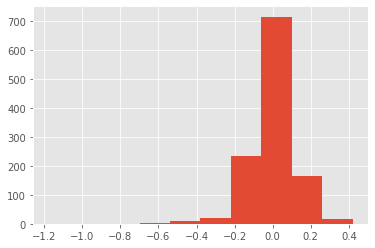

In [615]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(trainX, trainY)
residuals = trainY - lm.predict(trainX)
plt.hist(residuals)

In [616]:
print('MLR R^2 is equal to %.3f' %lm.score(trainset, y_train))
print('MLR RSS is equal to %.3f' %np.sum((lm.predict(trainset) - y_train) ** 2))

MLR R^2 is equal to -18870401.301
MLR RSS is equal to 4392985014.548


In [617]:
MLR_score = lm.score(testX, testY)
MLR_score

0.732789083379018

### Penalized Linear Regression

In [618]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

#### RIDGE

In [619]:
grid_para_ridge = {
    'alpha': np.linspace(1e-3,200,30)
}
grid_search_ridge = ms.GridSearchCV(ridge, grid_para_ridge, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_ridge.fit(trainX, trainY)

CPU times: user 394 ms, sys: 202 ms, total: 596 ms
Wall time: 1.31 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 6.89751724e+00, 1.37940345e+01, 2.06905517e+01,
       2.75870690e+01, 3.44835862e+01, 4.13801034e+01, 4.82766207e+01,
       5.51731379e+...
       8.27592069e+01, 8.96557241e+01, 9.65522414e+01, 1.03448759e+02,
       1.10345276e+02, 1.17241793e+02, 1.24138310e+02, 1.31034828e+02,
       1.37931345e+02, 1.44827862e+02, 1.51724379e+02, 1.58620897e+02,
       1.65517414e+02, 1.72413931e+02, 1.79310448e+02, 1.86206966e+02,
       1.93103483e+02, 2.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [620]:
print(grid_search_ridge.best_params_)
grid_search_ridge.best_score_

{'alpha': 0.001}


0.8848337238522571

In [621]:
ridge_final = grid_search_ridge.best_estimator_

In [622]:
ridge_final.score(trainset, y_train)

-18867654.503399204

In [623]:
ridge_final.score(testX, testY)

0.732784994598586

In [624]:
# ridge.set_params(alpha= 6.9)
# ridge.fit(trainset, y_train)
# ridge.score(trainset, y_train) # train score

In [625]:
ridge_score = ridge_final.score(testX, testY)
ridge_score

0.732784994598586

#### LASSO

In [626]:
grid_para_lasso = {
    'alpha': np.linspace(1e-3,200,30)
}
grid_search_lasso = ms.GridSearchCV(lasso, grid_para_lasso, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_lasso.fit(trainX, trainY)

CPU times: user 426 ms, sys: 28.7 ms, total: 455 ms
Wall time: 383 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 6.89751724e+00, 1.37940345e+01, 2.06905517e+01,
       2.75870690e+01, 3....
       8.27592069e+01, 8.96557241e+01, 9.65522414e+01, 1.03448759e+02,
       1.10345276e+02, 1.17241793e+02, 1.24138310e+02, 1.31034828e+02,
       1.37931345e+02, 1.44827862e+02, 1.51724379e+02, 1.58620897e+02,
       1.65517414e+02, 1.72413931e+02, 1.79310448e+02, 1.86206966e+02,
       1.93103483e+02, 2.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [627]:
print(grid_search_lasso.best_params_)
grid_search_lasso.best_score_

{'alpha': 0.001}


0.8832373690523692

In [628]:
lasso_final = grid_search_lasso.best_estimator_

In [629]:
# lasso.set_params(alpha= 13.8)
# lasso.fit(trainset, y_train)
# lasso.score(trainset, y_train) # train score

In [630]:
lasso_score = lasso_final.score(testX, testY)
lasso_score

0.7392669938230341

### Elastic Net

In [631]:
grid_para_elastic = {
    'alpha': np.linspace(1e-2, 10, 40),
    'l1_ratio': np.linspace(0.01, 1, 30)
}
grid_search_elastic = ms.GridSearchCV(net, grid_para_elastic, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_elastic.fit(trainX, trainY)

CPU times: user 6.19 s, sys: 247 ms, total: 6.44 s
Wall time: 11.1 s


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.26615385,  0.52230769,  0.77846154,  1.03461538,
        1.29076923...
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [632]:
print(grid_search_elastic.best_params_)
grid_search_elastic.best_score_

{'alpha': 0.01, 'l1_ratio': 0.01}


0.8840569578814363

In [633]:
net_final = grid_search_elastic.best_estimator_

In [634]:
net.set_params(alpha= 0.01, l1_ratio = 0.01)
net.fit(trainset, y_train)
net.score(trainset, y_train) # train score

/home/annie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.57392952199854, tolerance: 0.02327976343365451
  positive)


0.8796640516519006

In [635]:
net_score = net_final.score(testX, testY)
net_score

0.7343877334220806

### Random Forest

In [555]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

In [556]:
grid_para_forest = {
    'bootstrap': [True],
    'max_depth': range(1, 31),
    'n_estimators': [100, 150, 175]
}
grid_search_forest = ms.GridSearchCV(regr, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(trainX, trainY)

CPU times: user 5.16 s, sys: 210 ms, total: 5.37 s
Wall time: 3min 43s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [557]:
print(grid_search_forest.best_params_)
grid_search_forest.best_score_

{'bootstrap': True, 'max_depth': 12, 'n_estimators': 150}


0.878316804692278

In [558]:
grid_para_forest = {
    'bootstrap': [True],
    'max_depth': range(1, 31),
    'n_estimators': [175, 190, 200]
}
grid_search_forest = ms.GridSearchCV(regr, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(trainX, trainY)

CPU times: user 5.58 s, sys: 241 ms, total: 5.82 s
Wall time: 5min 5s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [559]:
print(grid_search_forest.best_params_)
grid_search_forest.best_score_

{'bootstrap': True, 'max_depth': 21, 'n_estimators': 190}


0.8785769952439733

In [560]:
regr_final = grid_search_forest.best_estimator_

In [561]:

regr_final.score(trainset, y_train) # train score

0.9630336025965861

In [562]:
regr_score = regr_final.score(testX, testY)
regr_score

0.8752768991104634

### Gradient Boosting Regressor

In [398]:
from sklearn.ensemble import GradientBoostingRegressor

In [399]:
gbmr = GradientBoostingRegressor()

In [400]:
# No parameter tuning; regular fitting leads to...
gbmr.fit(trainX,trainY)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [401]:
gbmr.score(trainX, trainY)

0.9611769306732598

In [402]:
gbmr.score(testX, testY)

0.8887114738106836

In [403]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbmr.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbmr.fit(trainX, trainY)
gen = gbmr.staged_predict(testX)
r2_rate1 = []
for n in range(n_estimators):
    predicted_targets = next(gen)
    if n not in steps: continue
    r2_rate1.append(r2_score(predicted_targets, testY))     

In [404]:
gbmr.set_params(learning_rate = 0.1)
gbmr.fit(trainX, trainY)
gen = gbmr.staged_predict(testX)
r2_rate01 = []
for n in range(n_estimators):
    predicted_targets = next(gen)
    if n not in steps: continue
    r2_rate01.append(r2_score(predicted_targets, testY))    

In [405]:
gbmr.set_params(learning_rate = 0.01)
gbmr.fit(trainX,trainY)
gen = gbmr.staged_predict(testX)
r2_rate001 = []
for n in range(n_estimators):
    predicted_targets = next(gen)
    if n not in steps: continue
    r2_rate001.append(r2_score(predicted_targets, testY))     

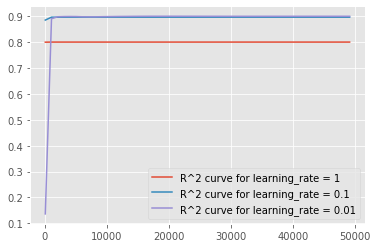

In [406]:
plt.plot(steps, r2_rate1,  label=r'R^2 curve for learning_rate = 1')
plt.plot(steps, r2_rate01, label=r'R^2 curve for learning_rate = 0.1')
plt.plot(steps, r2_rate001, label=r'R^2 curve for learning_rate = 0.01')
plt.legend(loc=4)

In [407]:
gbmr.set_params(learning_rate = 0.1, max_depth = 5)
    
gbmr.fit(trainX, trainY)
gen = gbmr.staged_predict(testX)
r2_maxdepth5 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth5.append(r2_score(predicted_targets, testY))     

In [408]:
gbmr.set_params(learning_rate = 0.1, max_depth = 10)
    
gbmr.fit(trainX, trainY)
gen = gbmr.staged_predict(testX)
r2_maxdepth10 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth10.append(r2_score(predicted_targets, testY))   

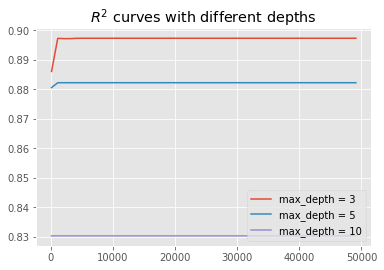

In [409]:
plt.plot(steps, r2_rate01, label='max_depth = 3')
plt.plot(steps, r2_maxdepth5, label='max_depth = 5')
plt.plot(steps, r2_maxdepth10, label='max_depth = 10')
plt.title('$R^2$ curves with different depths')
plt.legend(loc=4)

In [410]:
n_estimators = 50100
gbmr.set_params(learning_rate=0.1, max_depth=3, n_estimators=n_estimators)
train_r2 = []
test_r2  = []
steps = range(100,50100,1000)

gbmr.fit(trainX, trainY)
gen_train = gbmr.staged_predict(trainX)
gen_test  = gbmr.staged_predict(testX)

for n in range(n_estimators):
           predicted_train = next(gen_train)
           predicted_test  = next(gen_test)
           if n not in steps: continue
           train_r2.append(r2_score(predicted_train, trainY))
           test_r2.append(r2_score(predicted_test, testY))        

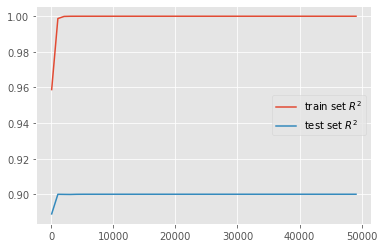

In [411]:
plt.plot(steps, train_r2, label='train set $R^2$')
plt.plot(steps, test_r2, label='test set $R^2$')
plt.legend(loc=7)

In [412]:
gbmr.set_params(learning_rate=0.1, max_depth=3, n_estimators=10000)
gbmr.fit(trainX, trainY)
gbmr.score(testX, testY)

0.8929068973437887

In [413]:
gbmr_score = gbmr.score(testX, testY)

### SVR

In [414]:
from sklearn.svm import SVR

In [415]:
svr = SVR()
svr.set_params(kernel='rbf')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [416]:
from sklearn.model_selection import GridSearchCV
paramDict = {'C':np.linspace(1,100,20), 'gamma':np.linspace(1e-4, 1e-2, 20)}
grid = GridSearchCV(svr, paramDict, return_train_score = True, scoring='r2', cv=5, n_jobs=-1)
ans_svr  = grid.fit(trainX, trainY)

In [417]:
ans_svr.best_params_

{'C': 6.2105263157894735, 'gamma': 0.0001}

In [418]:
ans_svr.best_score_

0.08742839103844482

In [115]:
svr.set_params(kernel='sigmoid')
paramDict = {'C':np.linspace(1,100,20), 'gamma':np.linspace(1e-4, 1e-2, 20)}
grid = GridSearchCV(svr, paramDict, return_train_score = True, scoring='r2', cv=5, n_jobs=-1)
ans_svr  = grid.fit(trainX, trainY)
print(ans_svr.best_params_)
print(ans_svr.best_score_)

{'C': 79.1578947368421, 'gamma': 0.0001}
-0.007725388295661384


In [271]:
from sklearn.model_selection import GridSearchCV
paramDict = {'C':np.linspace(1,100,20), 'gamma':np.linspace(1e-4, 1e-2, 10), 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(svr, paramDict, return_train_score = True, scoring='r2', cv=5, n_jobs=-1)
ans_svr  = grid.fit(trainX, trainY)

KeyboardInterrupt: 

In [419]:
svr_best = ans_svr.best_estimator_
svr_best.fit(trainX, trainY)
svr_score = svr_best.score(testX, testY)

### Model Comparisons

   model  test score
0    MLR    0.732789
1  Ridge    0.732785
2  Lasso    0.739267
3    Net    0.734388
4     RF    0.872424
5     GB    0.892907


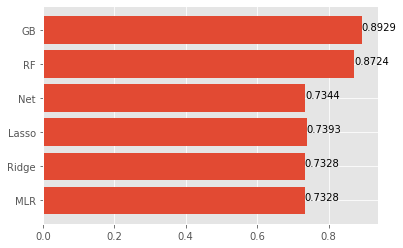

In [420]:
import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
model = ['MLR', 'Ridge', 'Lasso', 'Net', 'RF', 'GB']
scores = [MLR_score,ridge_score, lasso_score, net_score, regr_score, gbmr_score]
scoreDF = pd.DataFrame(list(zip(model, scores)), columns = ['model', 'test score'])
print(scoreDF)
#scoreDF.sort_values(by = 'test score', ascending = False).plot.bar(x='model')
plt.barh(model, scores)
for index, value in enumerate(scoreDF['test score']):
    plt.text(value, index, str(round(value,4)))

#### Interpret data using our best model, Random Forest

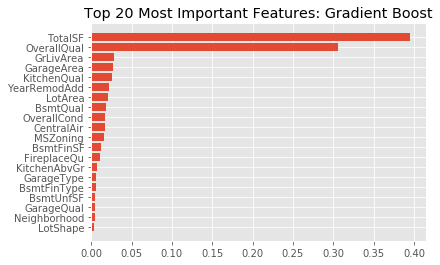

In [469]:
feature_importance = list(zip(trainset.columns, gbmr.feature_importances_))
dtype = [('feature', 'U20'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype = dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
top20 = sorted(feature_sort, key=lambda t: t[1], reverse=True)[:20]
featureNames, featureScores = zip(*list(top20))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('Top 20 Most Important Features: Gradient Boost')
plt.gca().invert_yaxis()

In [476]:
tree_final = grid_search_forest.best_estimator_
treefeature_importance = list(zip(trainset.columns, tree_final.feature_importances_))
dtype = [('feature', 'U20'), ('importance', 'float')]
treefeature_importance = np.array(treefeature_importance, dtype = dtype)
treefeature_sort = np.sort(treefeature_importance, order='importance')[::-1]
treefeature_sort


array([('TotalSF', 4.04445134e-01), ('OverallQual', 3.48374495e-01),
       ('CentralAir', 2.28426139e-02), ('GarageArea', 2.10212605e-02),
       ('YearRemodAdd', 1.66322670e-02), ('LotArea', 1.42214615e-02),
       ('GrLivArea', 1.37802194e-02), ('OverallCond', 1.33952055e-02),
       ('KitchenQual', 9.75107148e-03), ('MSZoning', 8.84941033e-03),
       ('BsmtUnfSF', 8.77732555e-03), ('BsmtFinSF', 8.77329063e-03),
       ('BsmtQual', 8.38093463e-03), ('GarageType', 6.61995339e-03),
       ('LotFrontage', 6.34860239e-03), ('TotalBsmtSF', 6.00440235e-03),
       ('Neighborhood', 5.95658651e-03), ('FireplaceQu', 4.62027619e-03),
       ('MoSold', 4.56730234e-03), ('2ndFlrSF', 4.34025375e-03),
       ('GarageQual', 4.17589093e-03), ('BsmtFinType', 3.60774589e-03),
       ('OpenPorchSF', 3.41674101e-03), ('KitchenAbvGr', 3.30611074e-03),
       ('LotShape', 2.97570178e-03), ('WoodDeckSF', 2.90582314e-03),
       ('MasVnrArea', 2.61642137e-03), ('Exterior1st', 2.45194114e-03),
       ('Sal

In [477]:
treetop20 = sorted(treefeature_sort, key=lambda t: t[1], reverse=True)[:20]

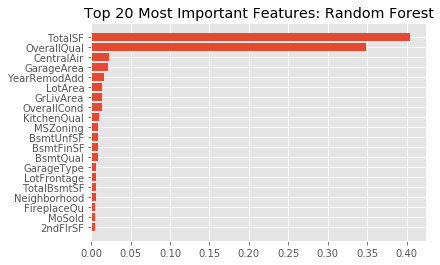

In [478]:
treefeatureNames, treefeatureScores = zip(*list(treetop20))
plt.barh(range(len(treefeatureScores)), treefeatureScores, tick_label=treefeatureNames)
plt.title('Top 20 Most Important Features: Random Forest')
plt.gca().invert_yaxis()

In [137]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
treeIdx = 10 # has to be less than 60
myTreeModel = grid_search_forest.best_estimator_.estimators_[treeIdx]

graph = Source(tree.export_graphviz(myTreeModel, out_file=None, feature_names=trainset.columns))
#SVG(graph.pipe(format='svg'))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.621895 to fit


'dtree_render.png'

In [316]:
trainset.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'BsmtFinType', 'BsmtFinSF'],
      dtype='object')

In [ ]:
train2 = trainset[['BsmtFullBath','OverallQual', 'GarageQual', 'Heating', '']]